In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('./resources/Cleaned_data_without_outliers.csv')

# Display the first few rows of the dataframe
df.head()

,price,beds,bath,propertysqft,borough,property_category,type,sublocality_ext,postcode,state_ext,latitude,longitude,price_per_sqft
0,2800000,5,4.0,3400.0,Brooklyn,Residential,pending,Brooklyn,11218,New York,40.643517,-73.966956,823.529412
1,2800000,3,3.0,3341.0,Brooklyn,Residential,condo,Brooklyn,11211,New York,40.709601,-73.968217,838.072433
2,2799000,3,3.0,2350.0,Brooklyn,Residential,condo,Brooklyn,11215,New York,40.667604,-73.993127,1191.063830
3,2798000,5,3.0,3400.0,Brooklyn,Residential,multi-family home,Brooklyn,11218,New York,40.657854,-73.975525,822.941176
4,2750000,3,3.0,2782.0,Brooklyn,Commercial,condo,Brooklyn,11231,New York,40.681105,-74.009814,988.497484


In [92]:
X = df.drop(['price','latitude','longitude','state_ext','postcode','sublocality_ext'], axis=1)
y = df['price']

In [93]:
X.dtypes

beds                   int64
bath                 float64
propertysqft         float64
borough               object
property_category     object
type                  object
price_per_sqft       float64
dtype: object

In [ ]:
select_features = ["beds", "bath", "propertysqft","price_per_sqft","borough","property_category", "type"]
# 

# Create another variable X_sel with only the columns
# in the "select_features" list

X_sel = df[select_features]
X_sel.head()

,beds,bath,propertysqft,borough,property_category,type
0,5,4.0,3400.0,Brooklyn,Residential,pending
1,3,3.0,3341.0,Brooklyn,Residential,condo
2,3,3.0,2350.0,Brooklyn,Residential,condo
3,5,3.0,3400.0,Brooklyn,Residential,multi-family home
4,3,3.0,2782.0,Brooklyn,Commercial,condo


In [95]:
# Set the target variable y
# y = df["price"].values.reshape(-1, 1)
y = df["price"]

In [96]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, random_state=42)

In [97]:
# Display X_train
X_train

,beds,bath,propertysqft,borough,property_category,type
2150,2,2.000000,800.000000,The Bronx,Residential,condo
1891,3,1.000000,2184.207862,Queens,Residential,house
497,4,4.000000,2393.000000,Staten Island,Residential,pending
1845,3,2.000000,980.000000,Staten Island,Residential,townhouse
342,2,1.000000,2184.207862,Brooklyn,Residential,condo
...,...,...,...,...,...,...
1638,3,2.000000,1575.000000,The Bronx,Residential,house
1095,3,2.373861,2184.207862,Brooklyn,Residential,land
1130,5,3.000000,2184.207862,Queens,Residential,house
1294,1,1.000000,2184.207862,Manhattan,Residential,pending


In [98]:
from sklearn.preprocessing import OneHotEncoder

# Use a OneHotEncoder to convert the training data to numerical values
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')
X_train_encoded = pd.DataFrame(data=ohe.fit_transform(X_train[['borough','property_category','type']]), columns=ohe.get_feature_names_out())
X_train_encoded

,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island,borough_The Bronx,property_category_Commercial,property_category_Hospitality,property_category_Other,property_category_Residential,type_co-op,...,type_condop,type_contingent,type_for sale,type_foreclosure,type_house,type_land,type_mobile house,type_multi-family home,type_pending,type_townhouse
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2028,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2029,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2030,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [99]:
# Encode the test data
X_test_encoded = pd.DataFrame(data=ohe.transform(X_test[['borough','property_category','type']]), columns=ohe.get_feature_names_out())
X_test_encoded

,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island,borough_The Bronx,property_category_Commercial,property_category_Hospitality,property_category_Other,property_category_Residential,type_co-op,...,type_condop,type_contingent,type_for sale,type_foreclosure,type_house,type_land,type_mobile house,type_multi-family home,type_pending,type_townhouse
0,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
674,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
675,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
676,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance and using it to scale the data

scaler = StandardScaler()

numerical_columns = ['beds','bath','propertysqft','price_per_sqft'] 
# 

In [101]:
# Scale the training data
X_train_scaled=scaler.fit_transform(X_train[numerical_columns])
X_test_scaled=scaler.transform(X_test[numerical_columns])

In [102]:
Scaled_df=pd.DataFrame(X_train_scaled,columns=numerical_columns)
Scaled_df_test=pd.DataFrame(X_test_scaled,columns=numerical_columns)

In [103]:
X_train_final=pd.concat([Scaled_df,X_train_encoded], axis=1)
X_test_final=pd.concat([Scaled_df_test,X_test_encoded], axis=1)

In [104]:
print(X_train_final.shape)
print(X_test_final.shape)

(2032, 24)
(678, 24)


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

# Hyperparameters for Grid Search
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False],
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Support Vector Regressor': {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 0.2],
        'kernel': ['linear', 'rbf']
    }
}

# Step 2 & 3: Train and evaluate models with Grid Search
best_models = {}
mse_scores = []
r2_scores = []

for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    
    # Get the parameter grid for this model
    param_grid = param_grids[model_name]
    
    # Perform Grid Search with 5-fold cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Train the model
    grid_search.fit(X_train_final, y_train)
    
    # Best parameters and best score
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Make predictions with the best model
    y_pred = best_model.predict(X_test_final)
    
    # Calculate MSE and R2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the best model and the evaluation metrics
    best_models[model_name] = best_model
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"{model_name} - MSE: {mse:.4f}, R2: {r2:.6f}\n")


Running GridSearchCV for Linear Regression...
Best Parameters for Linear Regression: {'fit_intercept': False}
Linear Regression - MSE: 3786650328691713297346534576226304.0000, R2: -17818235072596689289216.000000

Running GridSearchCV for Decision Tree...
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree - MSE: 97702388957.6151, R2: 0.540257

Running GridSearchCV for Random Forest...
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest - MSE: 86186737599.6883, R2: 0.594445

Running GridSearchCV for Gradient Boosting...
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Gradient Boosting - MSE: 94093027167.8991, R2: 0.557241

Running GridSearchCV for Support Vector Regressor...
Best Parameters for Support Vector Regressor: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}
Support 

Text(0, 0.5, 'MSE')

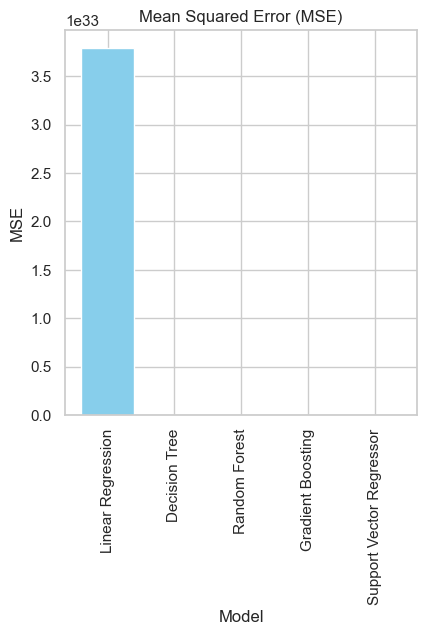

In [106]:
# Step 4: Plot the results

# Plot MSE scores
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)

plt.xticks(rotation=90)

plt.bar(models.keys(), mse_scores, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')



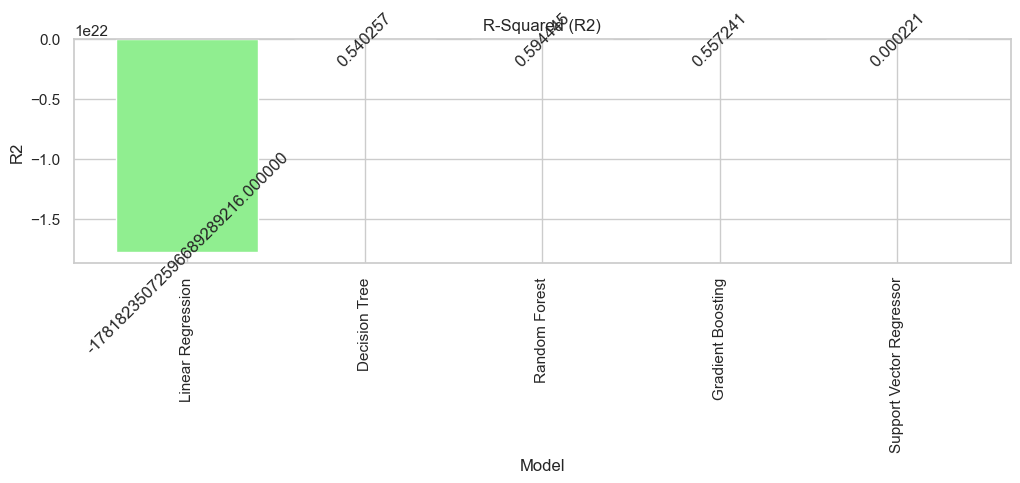

In [107]:
# Plot R2 scores
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
for i, v in enumerate(r2_scores):
    plt.text(i, v, f"{v:.6f}", ha='center', va='center', rotation=45)


plt.bar(models.keys(), r2_scores, color='lightgreen')
plt.title('R-Squared (R2)')
plt.xlabel('Model')
plt.ylabel('R2')

plt.tight_layout()
plt.show()



In [108]:
# Step 5: Suggest the best model
best_model_index = np.argmax(r2_scores)
best_model_name = list(models.keys())[best_model_index]
print(best_models[best_model_name])
print(f"\nBased on the evaluation, the best model is: {best_model_name} (highest R2 score)")

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5)

Based on the evaluation, the best model is: Random Forest (highest R2 score)


In [ ]:
feature_importance = best_models[best_model_name].feature_importances_
feature_names = X_train_final.columns  # List of feature names
importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    })
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                          Feature  Importance
1                            bath    0.403965
2                    propertysqft    0.286588
4               borough_Manhattan    0.074817
0                            beds    0.051940
3                borough_Brooklyn    0.036818
12                     type_co-op    0.022561
6           borough_Staten Island    0.020522
13                     type_condo    0.020058
5                  borough_Queens    0.016077
18                     type_house    0.015474
7               borough_The Bronx    0.015249
21         type_multi-family home    0.013789
22                   type_pending    0.007177
23                 type_townhouse    0.006406
19                      type_land    0.004871
17               type_foreclosure    0.001828
11  property_category_Residential    0.000598
8    property_category_Commercial    0.000534
10        property_category_Other    0.000435
15                type_contingent    0.000274
16                  type_for sale 

In [110]:
categorical_columns = {
    'borough': ['borough_Manhattan', 'borough_Brooklyn', 'borough_Queens', 'borough_Staten Island', 'borough_The Bronx'],
    'type': ['type_house', 'type_co-op', 'type_multi-family home', 'type_condo', 'type_pending', 'type_for sale', 'type_contingent', 'type_townhouse', 'type_condop', 'type_land', 'type_mobile house', 'type_foreclosure'],
    'property_category': ['property_category_Commercial', 'property_category_Residential', 'property_category_Other', 'property_category_Hospitality'],
}

# Create a new column for the aggregated importance of categorical features
importance_df['Original_Feature'] = importance_df['Feature'].apply(
    lambda x: next((k for k, v in categorical_columns.items() if x in v), x)
)

# Aggregate the importance for each original feature (sum the importance of one-hot encoded columns)
aggregated_importance = importance_df.groupby('Original_Feature')['Importance'].sum().reset_index()

# Sort by importance
aggregated_importance = aggregated_importance.sort_values(by='Importance', ascending=False)

# Print the results
print(aggregated_importance)

    Original_Feature  Importance
0               bath    0.403965
4       propertysqft    0.286588
2            borough    0.163482
5               type    0.092458
1               beds    0.051940
3  property_category    0.001567


/var/folders/5p/y9vfdxz132b7tj62wggjh0_m0000gn/T/ipykernel_68074/2888261496.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Original_Feature', data=aggregated_importance, palette='viridis')


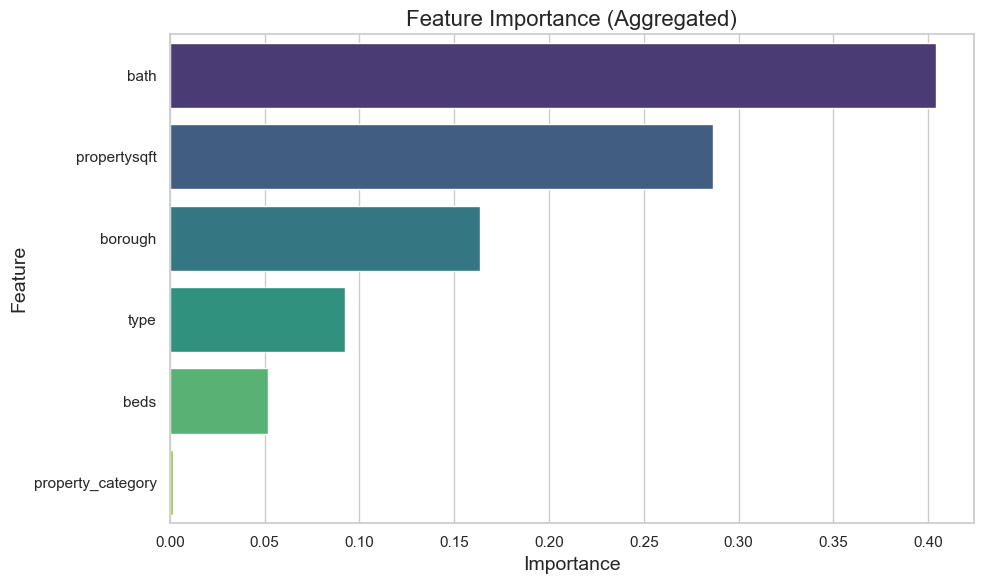

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'aggregated_importance' is the DataFrame we created earlier

# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x='Importance', y='Original_Feature', data=aggregated_importance, palette='viridis')

# Add labels and title
plt.title('Feature Importance (Aggregated)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()
